LOGISTIC REGRESSION WITH MNIST DATASET


step 1: Load Dataset

step 2: Make dataset iterable

step 3: Create Model Class

step 4: Instantiate Model Class

step 5: Instantiate Loss Class

step 6: Instantiate Optimizer Class

step 7: Train Model

In [1]:
#import libraries
import torch
import torch.nn as nn
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import collections


#Load train dataset of MNIST
Train_dataset = dsets.MNIST(root ='./data',
                            train = True,
                            transform = transforms.ToTensor(),
                            download = True)

#Load test dataset of MNIST
Test_dataset = dsets.MNIST(root = './data',
                           train = False,
                           transform = transforms.ToTensor())


n_train =len(Train_dataset)
n_test= len(Test_dataset)
print("Train Dataset: ",n_train)
print("Test Dataset:  ",n_test)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train Dataset:  60000
Test Dataset:   10000


In [2]:
#verifying shape of MNIST image
Train_dataset[0][0].numpy().shape

(1, 28, 28)

<function matplotlib.pyplot.show>

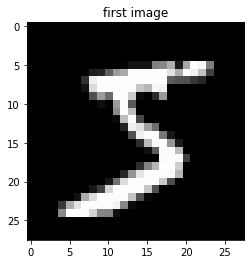

In [4]:
#plot image of MNIST image
image = Train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(image,cmap='gray')
plt.title("first image")
plt.show

<function matplotlib.pyplot.show>

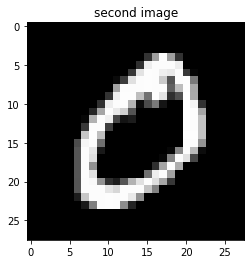

In [6]:
#plot second image of MNIST image
second_image = Train_dataset[1][0].numpy().reshape(28,28)
plt.imshow(second_image,cmap='gray')
plt.title("second image")
plt.show

In [7]:
a = Train_dataset[1][1]
b = Train_dataset[0][1]
print(a)
print(b)

0
5


In [8]:
#defining epochs
batch_size = 100
n_iterable = 3000
num_epochs = n_iterable / (len(Train_dataset)/batch_size)
num_epochs = int(num_epochs)
Train_Loader = torch.utils.data.DataLoader(dataset=Train_dataset,
                                      batch_size = batch_size,
 
                                      shuffle = True)
Test_Loader = torch.utils.data.DataLoader(dataset=Test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)
# check iterability
itb_train = isinstance(Train_Loader, collections.Iterable)
itb_test  = isinstance(Test_Loader, collections.Iterable)
print(itb_train)
print(itb_test)

True
True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


In [9]:
#Building Model
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim,output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    

  def forward(self,x):
    out = self.linear(x)
    return out


In [10]:
input_dim = 28*28   #from model
output_dim = 10
model = LogisticRegressionModel(input_dim,output_dim)

In [11]:
#Create Cross Entry Loss Class
criterion = nn.CrossEntropyLoss()

In [14]:
"""
 Instantiate Optimizer Class
 θ = θ − η⋅∇θ
 θ = parameters
 η = learning rate
 ∇θ = parameters' gradients
"""
learning_rate = 0.001
#with SGD
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# with ADAM
#optimizer = torch.optim.ADAM(model.parameters(), lr=learning_rate)

#with NESTEROV
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate,nesterov=True)


# Train Model
iteration = 0
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(Train_Loader):
    images = images.view(-1,28*28).requires_grad_()
    labels = labels

        # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
        # Forward pass to get output/logits
    outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
    loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
    loss.backward()

        # Updating parameters
    optimizer.step()

    iteration += 1

    if iteration % 500 == 0:
      correct = 0
      total = 0
          # Iterate test dataset
      for images,labels in Test_Loader:
        images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
        outputs = model(images)

                # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
        total += labels.size(0)

                # Total correct predictions
        correct += (predicted == labels).sum()

      accuracy = 100 * correct / total

        # Loss
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iteration, loss.item(), accuracy))

Iteration: 500. Loss: 1.0016539096832275. Accuracy: 83.5999984741211
Iteration: 1000. Loss: 0.7819299101829529. Accuracy: 84.16999816894531
Iteration: 1500. Loss: 0.8030479550361633. Accuracy: 84.69000244140625
Iteration: 2000. Loss: 0.7845524549484253. Accuracy: 85.05999755859375
Iteration: 2500. Loss: 0.7552760243415833. Accuracy: 85.41999816894531
Iteration: 3000. Loss: 0.7025135159492493. Accuracy: 85.69999694824219


In [15]:
# ACCURACY
correct = 0
total = 0
iter_test = 0
for images, labels in Test_Loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.item() / total)

print(accuracy)

85.7
